# prepare data 
### used 32 CPU for running this section  or large GPU  

In [1]:

from utils.download_extract_data import download_extract_data
from utils.dataset_preprocessing import dataset_preprocessing
from utils.augmentation_spiliting import augmentation_spiliting

2025-07-07 12:38:12.449895: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-07 12:38:12.560752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751891892.607760    1984 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751891892.623643    1984 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751891892.718465    1984 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
download_extract_data()

Installing Kaggle package...



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Kaggle package installation attempted.
Configuring Kaggle credentials...
Kaggle credentials configured successfully.
Dataset URL: https://www.kaggle.com/datasets/nih-chest-xrays/data
License(s): CC0-1.0


100%|██████████| 42.0G/42.0G [00:28<00:00, 1.59GB/s]



Dataset downloaded successfully.
Extracting dataset...
Dataset successfully downloaded and extracted!



                    CHEST X-RAY ANALYSIS PIPELINE                     

                 DATA LOADING & PREPARATION                 

➡️ Loading raw datasets...

📂 Dataset Summary:
- Bounding Box Data: 984 rows
- Main Entries Data: 112,120 rows
- Original Columns:
  ['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11']

🧹 Cleaning and filtering data...

🧼 Cleaning Report:
- Original entries: 112,120
- Final entries:    91,324
- Removed entries:  20,796
- Removed columns:  Unnamed: 11

🖼️ Mapping image paths...

📷 Image Mapping Report:
- Total images found:  176,874
- Successfully mapped: 91,324
- Missing images:      0

                     DATA VISUALIZATION                     

📈 Distribution Summary:
Diagnosis                      Cases
------------------------------------
No Finding                    60,361
Infiltration                 

/teamspace/studios/this_studio/Software/utils/dataset_preprocessing.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="mako")


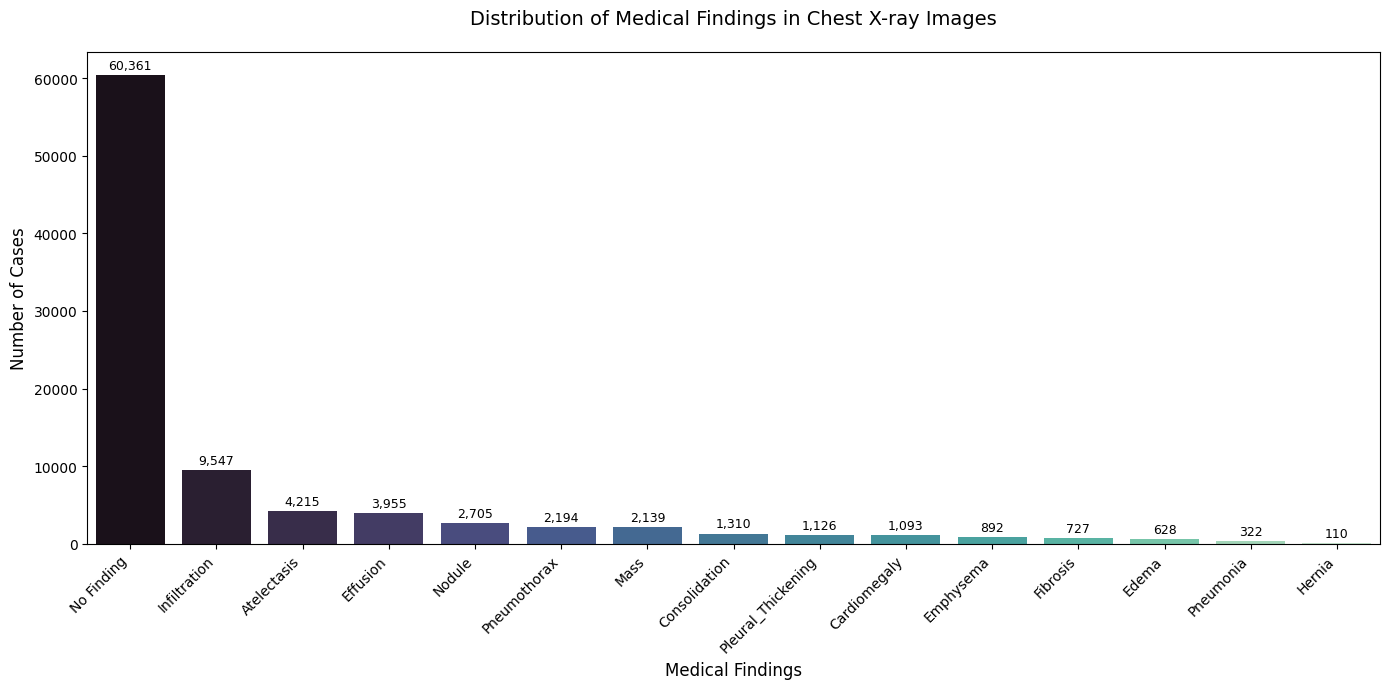


                        DATA EXPORT                         

✅ Entry Data Saved Successfully
   Path: /teamspace/studios/this_studio/Software/data/processed_entries.csv
   Shape: 91324 rows x 12 columns

✅ BBox Data Saved Successfully
   Path: /teamspace/studios/this_studio/Software/data/processed_bboxes.csv
   Shape: 984 rows x 9 columns

                          PIPELINE COMPLETE                           


In [3]:
dataset_preprocessing()

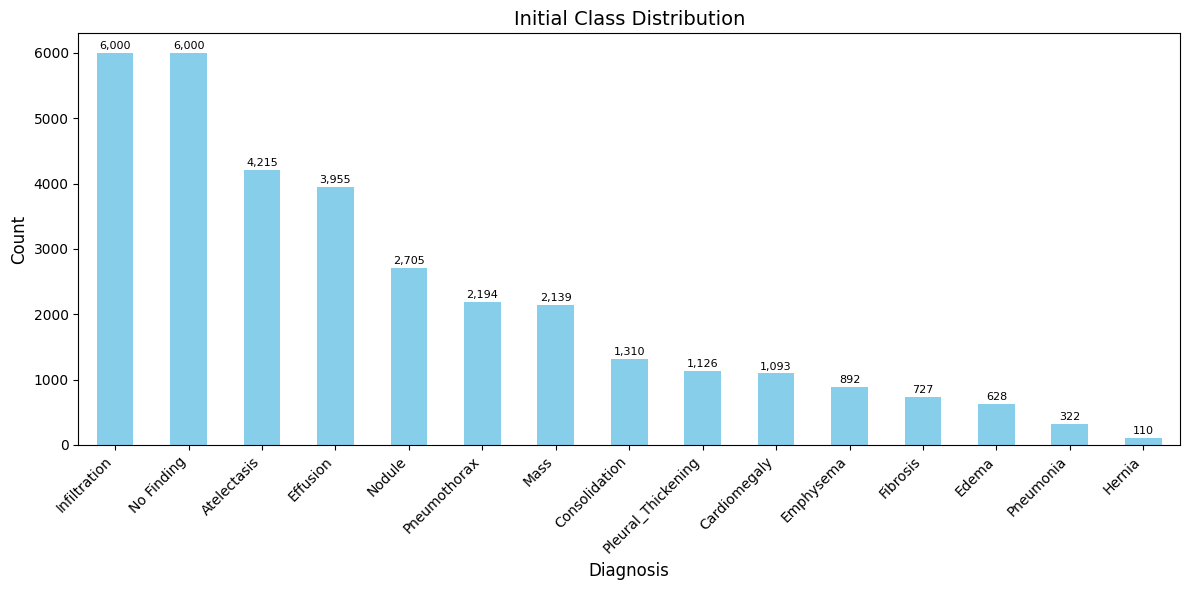

[ WARN:0@312.999] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
[ WARN:0@313.001] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
[ WARN:0@313.003] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
[ WARN:0@313.003] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
[ WARN:0@313.004] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
[ WARN:0@313.007] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
[ WARN:0@313.007] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
[ WARN:0@313.008] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
[ WARN:0@313.010] global loadsave.cpp:84

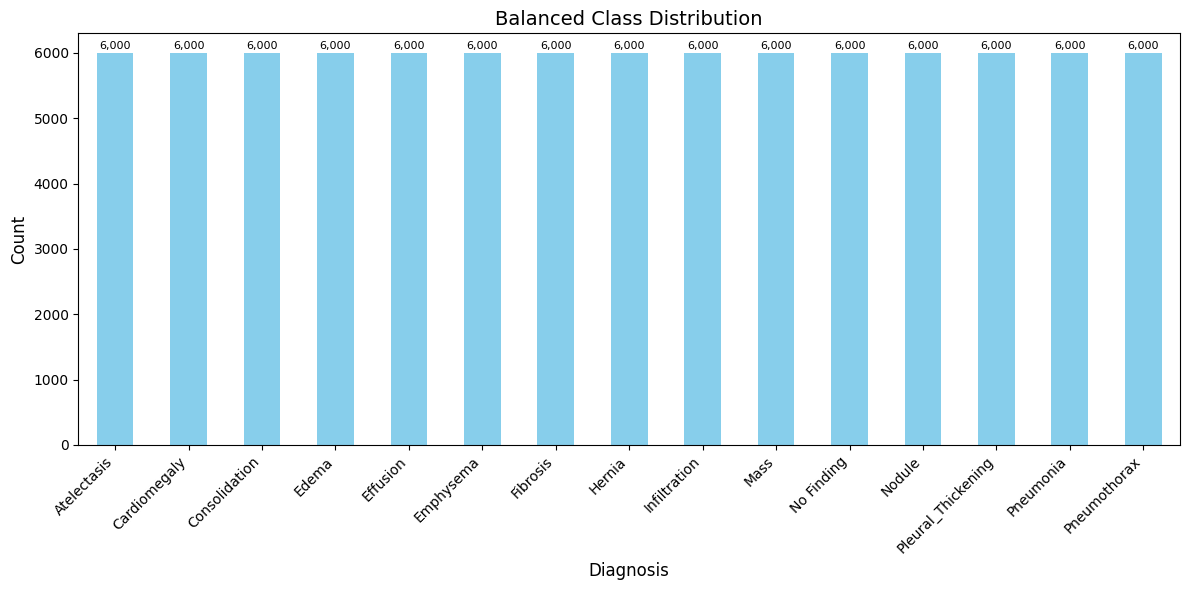

Pipeline completed successfully!


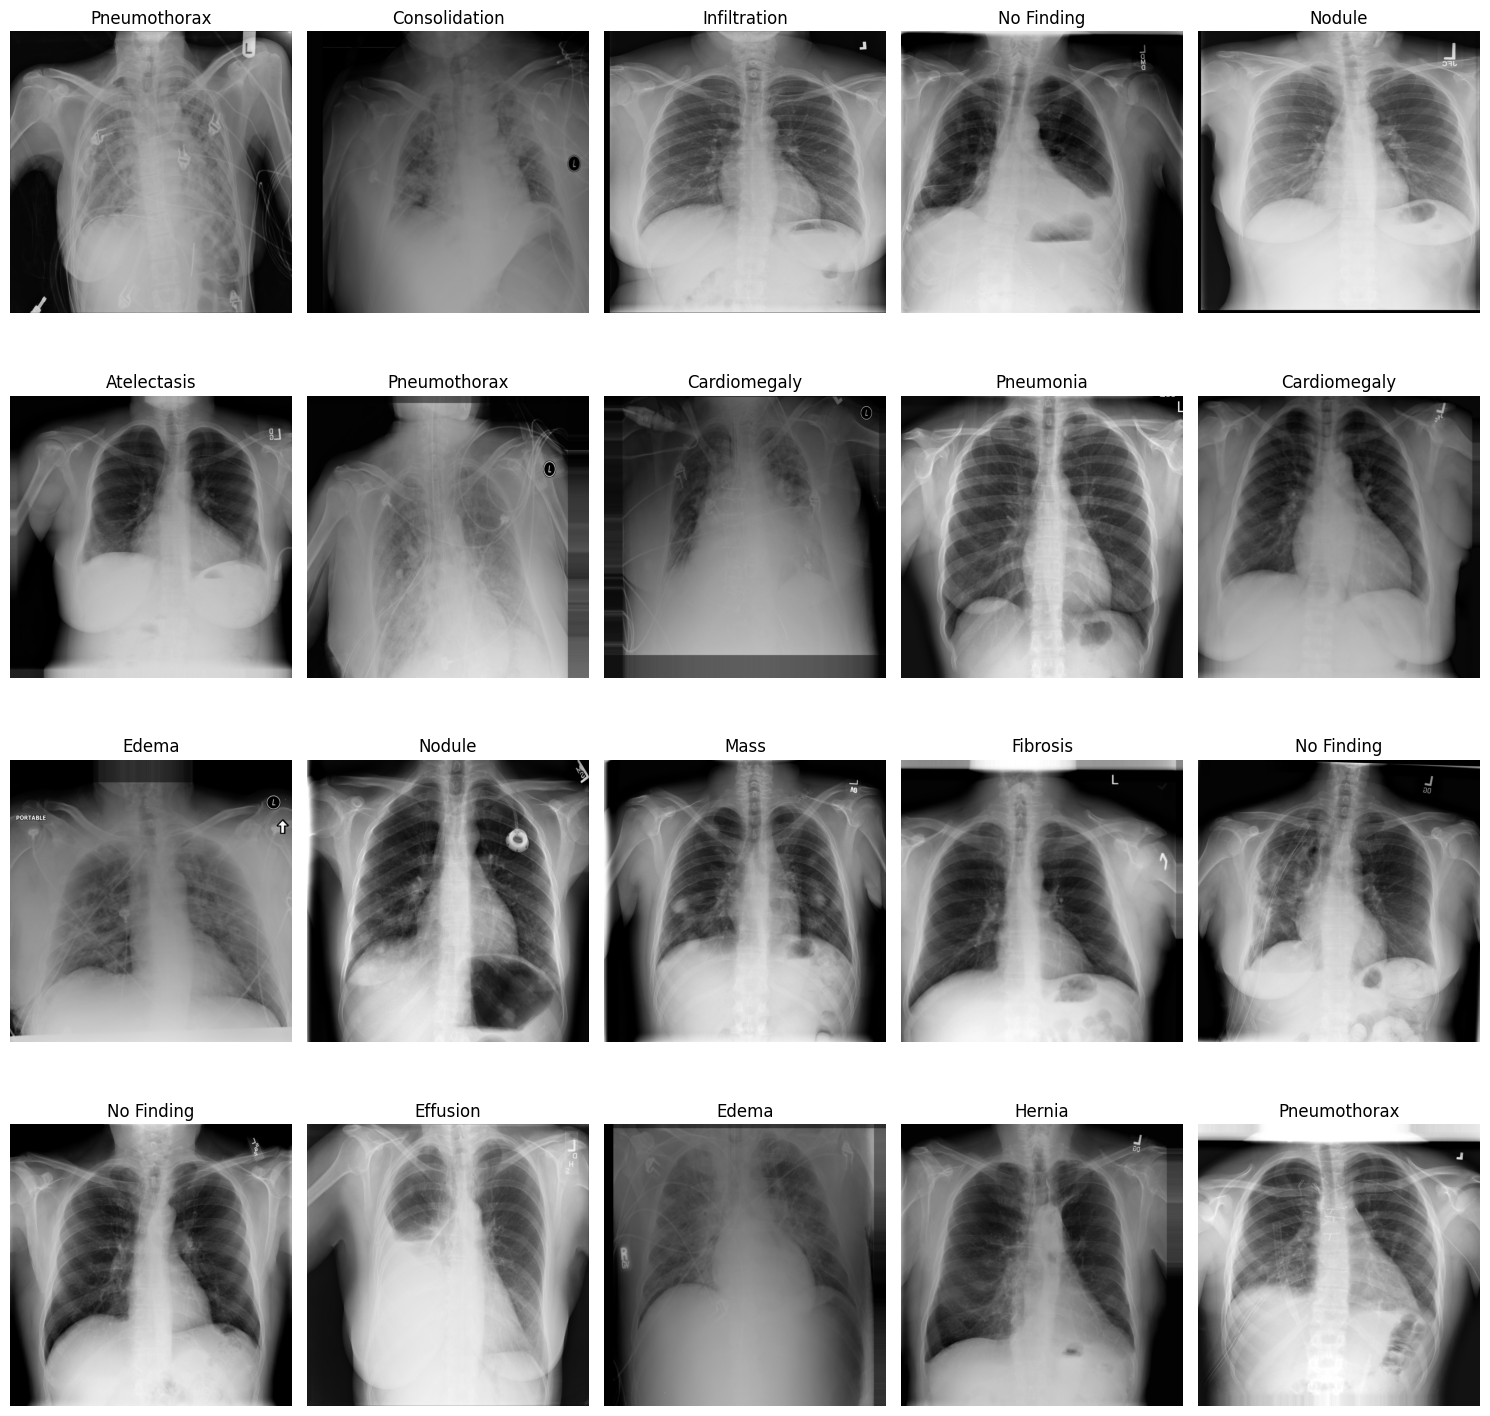

In [4]:
augmentation_spiliting()

# Train the model
### use L40S , T4  GPU for running this section  

In [1]:
import importlib
import torch 
from torchsummary import summary 
import utils.data_loaders as data_loaders_module
import utils.models as models_module
import utils.train as train_module

# Force reload of the modules
importlib.reload(data_loaders_module)
importlib.reload(models_module)
importlib.reload(train_module)

# Now access your objects freshly loaded
from utils.data_loaders import data_loaders
from utils.models import MobileNetV3_Small
from utils.train import train_and_save_models,plot_training_metrics,evaluate_model


2025-05-07 20:31:21.519292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746649881.542557  117906 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746649881.549786  117906 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746649881.567676  117906 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746649881.567709  117906 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746649881.567712  117906 computation_placer.cc:177] computation placer alr

In [2]:
train_loader, val_loader, test_loader=data_loaders()
# Check GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using 32 workers per DataLoader
Train batches: 1125
Validation batches: 141
Test batches: 141
Using device: cuda


In [3]:
# Initialize model
mobilenetv3_small = MobileNetV3_Small(in_channels=1, num_classes=15).to(device)
models={"mobilenetv3_small":mobilenetv3_small}
# Print model summary
print("\nSummary of MobileNetV3_Small:")
summary(mobilenetv3_small, input_size=(1, 224, 224))


Summary of MobileNetV3_Small:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             144
       BatchNorm2d-2         [-1, 16, 112, 112]              32
            hswish-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 16, 112, 112]             256
       BatchNorm2d-5         [-1, 16, 112, 112]              32
              ReLU-6         [-1, 16, 112, 112]               0
            Conv2d-7           [-1, 16, 56, 56]             144
       BatchNorm2d-8           [-1, 16, 56, 56]              32
              ReLU-9           [-1, 16, 56, 56]               0
           Conv2d-10           [-1, 16, 56, 56]             256
      BatchNorm2d-11           [-1, 16, 56, 56]              32
AdaptiveAvgPool2d-12             [-1, 16, 1, 1]               0
           Conv2d-13              [-1, 4, 1, 1]              64
      Ba

In [4]:
histories=train_and_save_models(
    initialized_models=models,
    train_loader=train_loader,
    val_loader=val_loader,
    version="v1",
    histories=None,
    output_dir='models',
    plots_dir='plots',
    epochs=5,
    patience=5,
    learning_rate=1e-4,
    weight_decay=1e-2,
    histories_file='training_histories.json',
    device=device
)


/teamspace/studios/this_studio/Software/utils/train.py:68: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Training mobilenetv3_small


Epoch 1/30  18s] loss: 2.5408 - accuracy: 15.24% - val_loss: 2.4257 - val_accuracy: 18.99% - lr: 1.10e-03


Epoch 2/30  12s] loss: 2.4009 - accuracy: 19.64% - val_loss: 2.3556 - val_accuracy: 20.39% - lr: 1.10e-03


Epoch 3/30  12s] loss: 2.3129 - accuracy: 22.84% - val_loss: 2.2873 - val_accuracy: 24.36% - lr: 1.10e-03


Epoch 4/30  12s] loss: 2.1920 - accuracy: 26.99% - val_loss: 2.1366 - val_accuracy: 28.68% - lr: 1.10e-03


Epoch 5/30  12s] loss: 2.0555 - accuracy: 31.21% - val_loss: 2.0234 - val_accuracy: 33.16% - lr: 1.10e-03


Epoch 6/30  14s] loss: 1.9404 - accuracy: 35.10% - val_loss: 1.9048 - val_accuracy: 36.09% - lr: 1.10e-03


Epoch 7/30  12s] loss: 1.8317 - accuracy: 38.54% - val_loss: 1.9609 - val_accuracy: 34.52% - lr: 1.10e-03


Epoch 8/30  13s] loss: 1.6852 - accuracy: 43.38% - val_loss: 1.6804 - val_accuracy: 44.31% - lr: 1.10e-03


Epoch 9/30  13s] loss: 1.5360 - accuracy: 48.43% - val_loss: 1.5666 - val_accuracy: 47.84% - lr: 1.10e-03


Epoch 10/30  15s] loss: 1.3920 - accuracy: 53.23% - val_loss: 1.4943 - val_accuracy: 50.93% - lr: 1.10e-03


Epoch 11/30  12s] loss: 1.2372 - accuracy: 58.37% - val_loss: 1.4076 - val_accuracy: 54.32% - lr: 1.10e-03


Epoch 12/30  12s] loss: 1.0786 - accuracy: 63.55% - val_loss: 1.3567 - val_accuracy: 56.07% - lr: 1.10e-03


Epoch 13/30  13s] loss: 0.9503 - accuracy: 68.03% - val_loss: 1.2575 - val_accuracy: 60.20% - lr: 1.10e-03


Epoch 14/30  13s] loss: 0.8389 - accuracy: 71.66% - val_loss: 1.1532 - val_accuracy: 64.03% - lr: 1.10e-03


Epoch 15/30  13s] loss: 0.7151 - accuracy: 75.79% - val_loss: 1.1597 - val_accuracy: 65.94% - lr: 1.10e-03


Epoch 16/30  12s] loss: 0.6379 - accuracy: 78.55% - val_loss: 1.0937 - val_accuracy: 67.82% - lr: 1.10e-03


Epoch 17/30  15s] loss: 0.5618 - accuracy: 80.99% - val_loss: 1.1008 - val_accuracy: 68.68% - lr: 1.10e-03


Epoch 18/30  13s] loss: 0.5112 - accuracy: 82.57% - val_loss: 1.0770 - val_accuracy: 69.57% - lr: 1.10e-03


Epoch 19/30  13s] loss: 0.4504 - accuracy: 84.63% - val_loss: 1.0559 - val_accuracy: 71.31% - lr: 1.10e-03


Epoch 20/30  13s] loss: 0.4085 - accuracy: 86.02% - val_loss: 1.0706 - val_accuracy: 72.32% - lr: 1.10e-03


Epoch 21/30  12s] loss: 0.3775 - accuracy: 87.08% - val_loss: 1.0412 - val_accuracy: 72.89% - lr: 1.10e-03


Epoch 22/30  15s] loss: 0.3486 - accuracy: 88.11% - val_loss: 1.1139 - val_accuracy: 72.58% - lr: 1.10e-03


Epoch 23/30  12s] loss: 0.3263 - accuracy: 88.90% - val_loss: 1.0881 - val_accuracy: 74.23% - lr: 1.10e-03


Epoch 24/30  12s] loss: 0.2931 - accuracy: 89.99% - val_loss: 1.0911 - val_accuracy: 73.78% - lr: 1.10e-03


Epoch 25/30  12s] loss: 0.1210 - accuracy: 95.92% - val_loss: 1.1098 - val_accuracy: 79.27% - lr: 5.50e-04


Epoch 26/30  12s] loss: 0.0974 - accuracy: 96.61% - val_loss: 1.1849 - val_accuracy: 79.02% - lr: 5.50e-04

Early stopping at epoch 26

Finished training mobilenetv3_small


In [7]:
histories=train_and_save_models(
    initialized_models=models,
    train_loader=train_loader,
    val_loader=val_loader,
    version="v2",
    histories=histories,
    output_dir='models',
    plots_dir='plots',
    epochs=5,
    patience=5,
    learning_rate=1e-4,
    weight_decay=1e-2,
    histories_file='training_histories.json',
    device=device
)


/teamspace/studios/this_studio/Software/utils/train.py:68: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Training mobilenetv3_small


Epoch 1/5  17s] loss: 0.0390 - accuracy: 98.77% - val_loss: 1.1820 - val_accuracy: 80.76% - lr: 1.00e-04


Epoch 2/5  13s] loss: 0.0178 - accuracy: 99.49% - val_loss: 1.2625 - val_accuracy: 80.81% - lr: 1.00e-04


Epoch 3/5  13s] loss: 0.0125 - accuracy: 99.68% - val_loss: 1.3397 - val_accuracy: 81.09% - lr: 1.00e-04


Epoch 4/5  12s] loss: 0.0113 - accuracy: 99.69% - val_loss: 1.4124 - val_accuracy: 81.28% - lr: 1.00e-04


Epoch 5/5  15s] loss: 0.0081 - accuracy: 99.80% - val_loss: 1.4417 - val_accuracy: 81.09% - lr: 5.00e-05

Finished training mobilenetv3_small


In [8]:
print("***************************************************")
# Assuming you have a trained model and a test_loader
accuracy, f1, report = evaluate_model(mobilenetv3_small, test_loader)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("Classification Report:")
print(report)
print("***************************************************")

***************************************************
Test Accuracy: 0.8169
Test F1 Score: 0.8162
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       600
           1       0.67      0.73      0.70       600
           2       0.69      0.63      0.66       600
           3       0.71      0.65      0.68       600
           4       0.75      0.74      0.75       600
           5       0.80      0.81      0.80       600
           6       0.84      0.71      0.77       600
           7       0.83      0.86      0.84       600
           8       0.83      0.82      0.82       600
           9       0.87      0.90      0.89       600
          10       0.91      0.91      0.91       600
          11       0.87      0.87      0.87       600
          12       0.93      0.95      0.94       600
          13       0.93      0.95      0.94       600
          14       0.99      1.00      1.00       600

    accuracy   

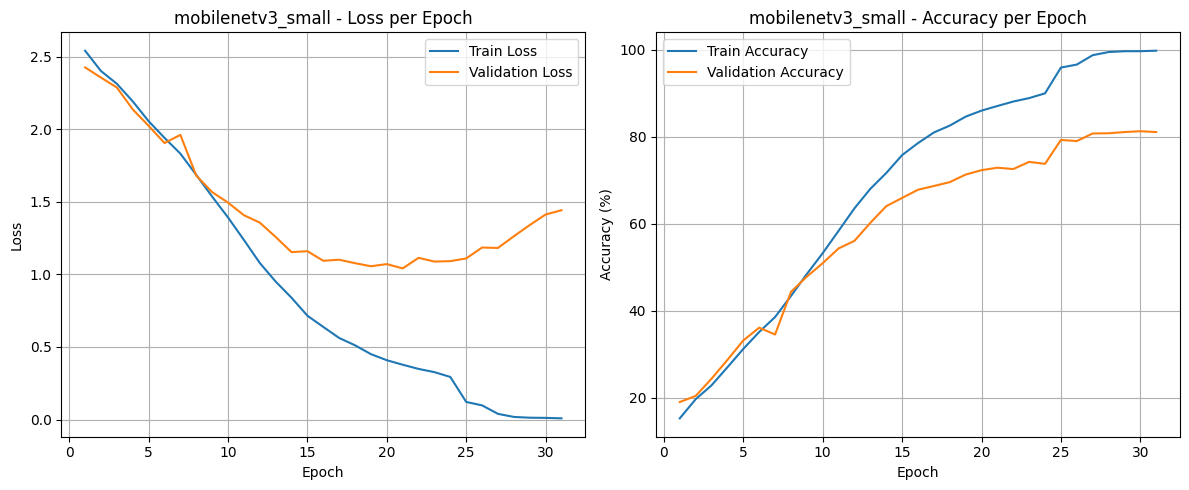

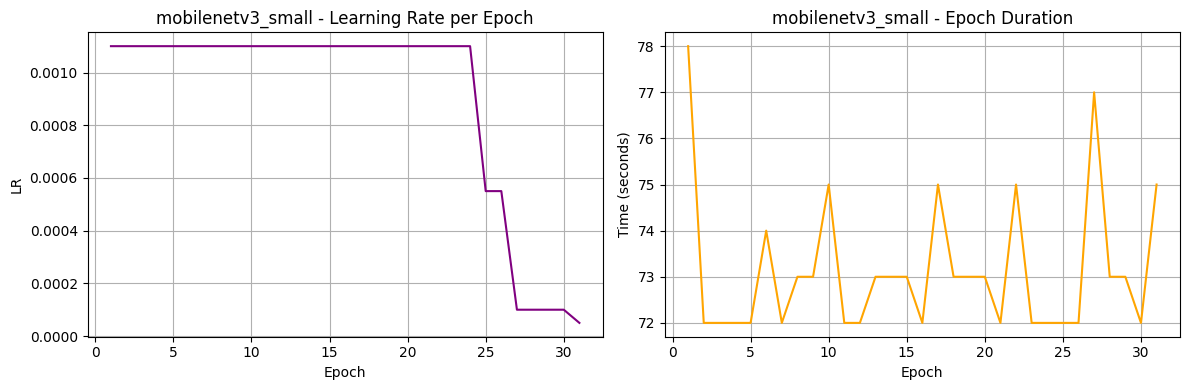

In [22]:
import json
# Load JSON file
with open("training_histories.json", "r") as f:
    metrics = json.load(f)
plot_training_metrics(metrics)

# Quantization
### use L40S , T4  GPU for running this section  

In [1]:
import importlib
import torch 
import utils.data_loaders as data_loaders_module
import utils.models as models_module
import utils.quantization  as qun 
# Force reload of the modules
importlib.reload(data_loaders_module)
importlib.reload(models_module)
importlib.reload(qun)

# Now access your objects freshly loaded
from utils.data_loaders import data_loaders
from utils.models import MobileNetV3_Small
from utils.quantization import *


In [2]:
train_loader, val_loader, test_loader=data_loaders()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using 16 workers per DataLoader
Train batches: 1125
Validation batches: 141
Test batches: 141
Using device: cuda


In [3]:
model = MobileNetV3_Small(in_channels=1, num_classes=15)
model.load_state_dict(torch.load("models/mobilenetv3_small_best_v2_0.pth"))

<All keys matched successfully>

In [4]:
import torch.nn.functional as F

for images, labels in test_loader:
    image = images[0]  # shape: (C, H, W)
    break

# Add 1-pixel zero padding on all sides (left, right, top, bottom)
# Padding format: (pad_left, pad_right, pad_top, pad_bottom)
padded_image = F.pad(image, (1, 1, 1, 1), mode='constant', value=0)


In [5]:
activations=run_qun_range_based(test_loader, image, model)


Activation Range Summary:
Tracked layers: 190
Global minimum: -65.196350 (found in 'bneck.10.conv3')
Global maximum: 58.138992 (found in 'bneck.1.bn1')
Total range: 123.335342


In [6]:
dump_all_quantized(model, activations, float_len=8, int_len=8)

In [1]:
import shutil 
shutil.rmtree("calibration_data")

# pytroch to tf 

In [3]:
from utils.models import MobileNetV3_Small
import torch 
model = MobileNetV3_Small(in_channels=1, num_classes=15)
model.load_state_dict(torch.load("models/mobilenetv3_small_best_v2_0.pth", map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
import torch

# Assuming `model` is your PyTorch model and it's on CPU
model.eval()

dummy_input = torch.randn(1, 1, 224, 224)  # Adjust shape as needed
torch.onnx.export(
    model,
    dummy_input,
    "models/model.onnx",
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}},
    opset_version=11
)


In [ ]:
from onnx_tf.backend import prepare
import onnx

onnx_model = onnx.load("models/model.onnx")
tf_rep = prepare(onnx_model)
tf_rep.export_graph("models/model_tf")  # This creates a TensorFlow SavedModel directory
